In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


mnist = fetch_openml('mnist_784', version=1)
df = pd.DataFrame(mnist.data)
df['target'] = mnist.target.astype(int)

X, y = mnist["data"], mnist["target"].astype(int)

5


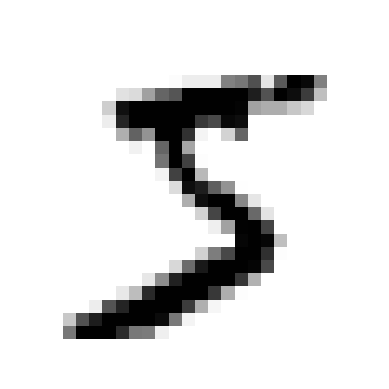

In [2]:
some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)

print(y[0])
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [3]:
# train - test split with stratification
test_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in test_split.split(df, df["target"]):
    X_train, y_train = X.loc[train_index], y.loc[train_index]
    X_test, y_test = X.loc[test_index], y.loc[test_index]

print(y_train.value_counts().sort_index() / len(X_train))
print(y_test.value_counts().sort_index() / len(X_test))

class
0    0.098607
1    0.112536
2    0.099857
3    0.102018
4    0.097482
5    0.090179
6    0.098232
7    0.104179
8    0.097500
9    0.099411
Name: count, dtype: float64
class
0    0.098643
1    0.112500
2    0.099857
3    0.102000
4    0.097500
5    0.090214
6    0.098214
7    0.104214
8    0.097500
9    0.099357
Name: count, dtype: float64


In [4]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# accuracy bad because dataset is unbalanced

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

print(confusion_matrix(y_train_5, y_train_pred))
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

[[50550   400]
 [ 1600  3450]]
0.8961038961038961
0.6831683168316832


In [5]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

b:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([1102.40044114])

In [6]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [7]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

(0.0, 1.01)

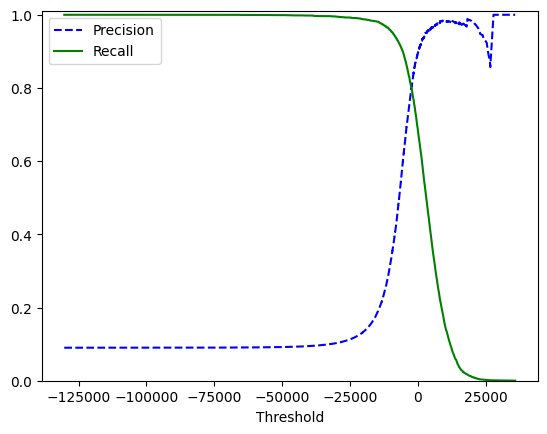

In [8]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0, 1.01])

0.9666493494884326


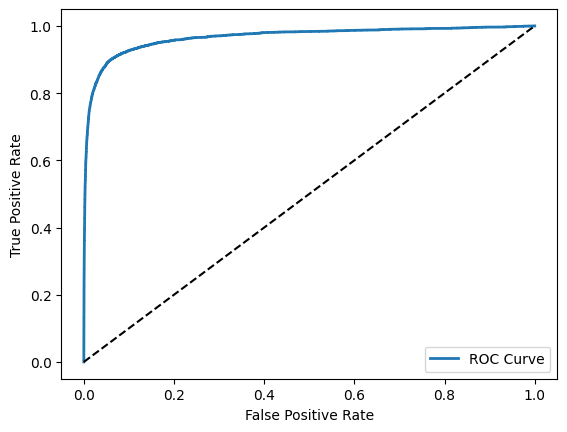

In [9]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
print(roc_auc_score(y_train_5, y_scores))
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

0.9985417192160826


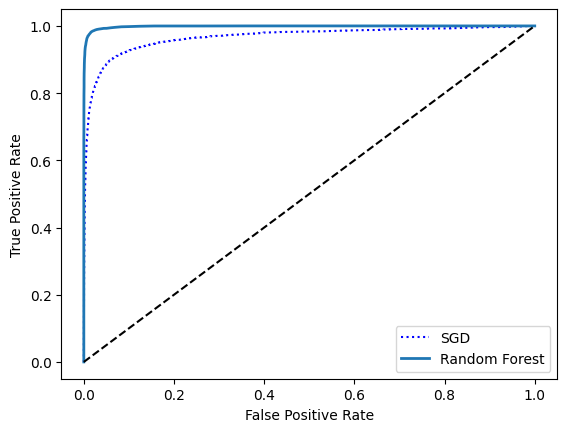

In [10]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

print(roc_auc_score(y_train_5, y_scores_forest))
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

In [12]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
print(svm_clf.predict([some_digit])) # automatically applies One vs Rest when multiple classes

some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores)

[5]
[[ 1.72272321  2.73032508  7.25175555  8.30711661 -0.31136489  9.31339289
   1.71309107  2.78844516  6.20203795  4.85366143]]


b:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
b:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [13]:
sgd_clf.fit(X_train, y_train)
print(sgd_clf.predict([some_digit]))
print(sgd_clf.decision_function([some_digit]))

[3]
[[-16951.72702042 -20114.97289119  -9407.2973856    2534.97015539
  -18384.25024129   2072.97845031 -21309.62136633 -23955.17300096
   -4543.19867955 -12106.33618118]]


b:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
b:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [14]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87727005, 0.87593079, 0.88454945])

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
print(cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
24367       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
24367        0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
24367         0         0         0         0         0  

[1 rows x 784 columns]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


b:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[0.90196604 0.8967697  0.90662167]


b:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


b:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
b:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[[5227    0   17    7    4   32   35    6  193    1]
 [   0 6019   38   13    5   39    6    5  166   11]
 [  20   25 4954   76   70   22   58   34  319   14]
 [  25   18  111 4924    0  171   22   38  339   65]
 [   6   11   42    8 4890    9   36   22  293  142]
 [  26   19   27  152   58 4148   75   14  469   62]
 [  24   19   57    1   43   88 5141    8  120    0]
 [  20   12   57   21   41   10    3 5313  141  216]
 [  21   56   44   83    6  113   29    8 5055   45]
 [  26   17   21   57  125   32    0  157  303 4829]]


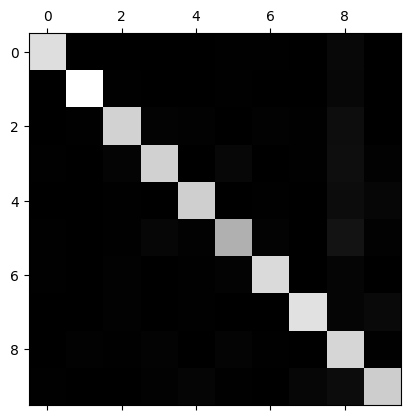

In [17]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

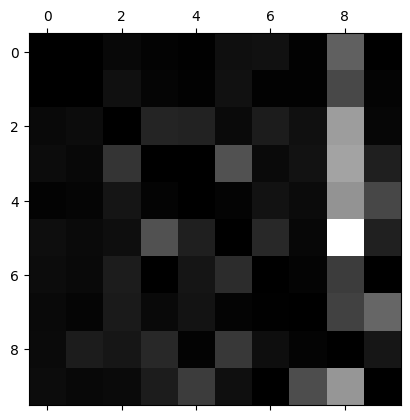

In [18]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit])

b:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])